In [96]:
import numpy as np
import ripser
from ripser import Rips
from persim import plot_diagrams
import time
import urllib

In [31]:
f = open("6y74_A.txt")
g = np.genfromtxt(f, delimiter = '')
data = g[0:,1:]

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
time with one extra point: 0.9912440776824951 seconds


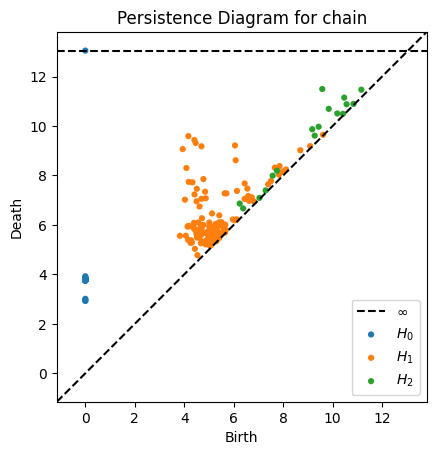

In [32]:
rips = Rips(maxdim=2)
tic = time.time()
diagrams = rips.fit_transform(data)
rips.plot(diagrams, title = 'Persistence Diagram for chain')
toc = time.time()
print('time with one extra point:',toc-tic, 'seconds')

I import a file with a list of the non-redundant trefoil knots. I make a list called big_data which has as each entry a list of the protein name, chain, knot/slipknot, and knot type.

In [49]:
f = open('K31_knots.txt')

In [62]:
big_data = []

with open('K31_knots.txt', "r") as f:
    rows = f.readlines()[1:]
    
for row in rows:
    big_data.append(row.split(';'))

3iqk


In [79]:
for item in big_data:
    url = 'https://knotprot.cent.uw.edu.pl/chains/{pdbid}/{chain}/chain.xyz.txt'
    link = url.format(pdbid = item[0],chain = item[1])
    file = urllib.request.urlopen(link)
    g = np.genfromtxt(file, delimiter = '')
    data = g[0:,1:]
    item.append(data)

In [81]:
print(big_data[3])

['6qqz', 'A', 'K', '+3.1\n', array([[-33.916,  -3.592, -22.471],
       [-33.057,  -0.347, -20.67 ],
       [-35.215,   2.689, -19.976],
       [-33.486,   5.991, -19.232],
       [-35.465,   8.976, -17.954],
       [-33.643,  12.305, -17.73 ],
       [-35.071,  15.203, -15.691],
       [-33.777,  18.686, -16.443],
       [-34.783,  22.332, -16.812],
       [-32.999,  22.251, -20.171],
       [-34.577,  19.352, -22.114],
       [-33.105,  20.611, -25.383],
       [-29.598,  19.881, -24.064],
       [-30.303,  16.143, -24.229],
       [-31.207,  16.331, -27.938],
       [-27.879,  14.715, -28.977],
       [-28.721,  11.529, -27.078],
       [-32.021,  11.131, -28.93 ],
       [-30.075,  11.535, -32.185],
       [-27.357,   9.075, -31.119],
       [-29.825,   6.171, -30.957],
       [-30.099,   3.796, -33.966],
       [-33.647,   2.987, -35.062],
       [-32.996,  -0.755, -34.98 ],
       [-32.286,  -0.658, -31.233],
       [-35.405,   1.391, -30.502],
       [-37.537,  -0.817, -32.741],

Now big_data has a 5th entry in each item which is the point cloud of amino acids!

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
time: 1.118981122970581 seconds


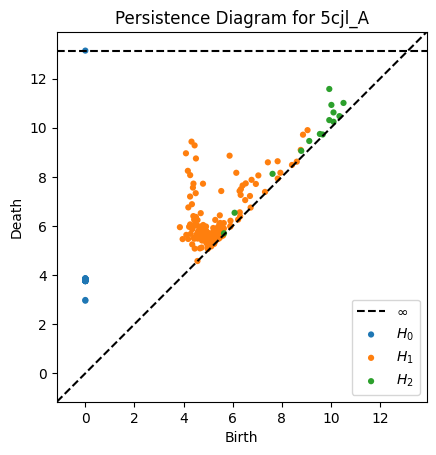

In [83]:
i=10

rips = Rips(maxdim=2)
tic = time.time()
diagrams = rips.fit_transform(big_data[i][4])
rips.plot(diagrams, title = 'Persistence Diagram for {pdbid}_{chain}'.format(pdbid=big_data[i][0],chain=big_data[i][1]))
toc = time.time()
print('time:',toc-tic, 'seconds')

PDBID & Chain protein finder

In [93]:
def rips_pd(pdbid,chain):
    url = 'https://knotprot.cent.uw.edu.pl/chains/{pdbid}/{chain}/chain.xyz.txt'
    link = url.format(pdbid = pdbid,chain = chain)
    file = urllib.request.urlopen(link)
    g = np.genfromtxt(file, delimiter = '')
    data = g[0:,1:]
    rips = Rips(maxdim=2)
    diagrams = rips.fit_transform(data)
    plot = rips.plot(diagrams, title = 'Persistence Diagram for {pdbid}_{chain}'.format(pdbid=pdbid,chain=chain))
    return plot


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


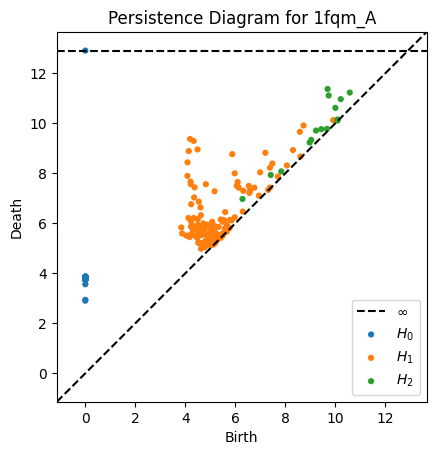

In [94]:
rips_pd('1fqm','A')

Protein data finder

In [97]:
def get_data(pdbid,chain):
    url = 'https://knotprot.cent.uw.edu.pl/chains/{pdbid}/{chain}/chain.xyz.txt'
    link = url.format(pdbid = pdbid,chain = chain)
    file = urllib.request.urlopen(link)
    g = np.genfromtxt(file, delimiter = '')
    data = g[0:,1:]
    return data

In [98]:
get_data('3kzn','A')

array([[ 81.762,  49.477,  80.513],
       [ 84.993,  51.314,  81.371],
       [ 88.306,  49.422,  81.623],
       [ 91.863,  50.461,  82.474],
       [ 93.738,  48.952,  79.537],
       [ 95.851,  51.975,  78.606],
       [ 96.212,  55.567,  79.764],
       [ 95.865,  56.576,  76.113],
       [ 92.175,  55.543,  76.293],
       [ 91.509,  57.963,  79.15 ],
       [ 91.172,  61.745,  78.906],
       [ 93.739,  64.032,  80.543],
       [ 91.097,  65.099,  83.06 ],
       [ 90.396,  61.463,  83.979],
       [ 94.088,  60.654,  84.361],
       [ 94.597,  63.782,  86.46 ],
       [ 91.741,  62.588,  88.668],
       [ 93.369,  59.171,  89.094],
       [ 96.716,  60.678,  90.049],
       [ 95.034,  63.002,  92.545],
       [ 93.053,  60.144,  94.064],
       [ 96.34 ,  58.229,  94.272],
       [ 97.83 ,  61.148,  96.213],
       [ 94.834,  61.075,  98.568],
       [ 95.189,  57.343,  99.233],
       [ 98.868,  57.942, 100.018],
       [ 97.786,  60.369, 102.743],
       [ 95.058,  58.039, 10